<a href="https://colab.research.google.com/github/alamin-sarker/HIT391_Machine_Learning/blob/main/Assignment2_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 2: Regression
###Step 1: Loading Data, Data Pre-processing, EDA

D4 is a regression problem where the objective is to predict the life expectancy using WHO data. It has a good number of features and instances. It also has a continuous target variable, which makes it an ideal dataset for regression tasks.

First, let's load the necessary libraries and data:

In [ ]:
# Mounting Google Drive to access the CSV file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setting random seed for reproducibility
np.random.seed(42)

# Loading the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/ml_assignment_dataset/D4/Life-Expectancy-Data.csv")



Next, let's take a look at the data:

In [ ]:
# Checking top 5 rows of the dataset
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Geting the dimensions of the DataFrame (number of rows and columns)
df.shape

(2938, 22)

In [ ]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Checking for missing values
df.isna().sum()  # isna() or isnull()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

There are many null or nan or missing values in the data. Let's fill the missing values with mean value.

In [ ]:
# Filling missing values with mean
# df.fillna(df.mean(), inplace=True)
df = df.fillna(df.mean())

<ipython-input-49-07db502ea0b7>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
# Checking for missing values again
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Checking for duplicate values
print(df.duplicated().sum())

0


In [ ]:
# Checking the summary statistics of the dataset
print(df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.507640       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.200000        74.000000       0.000000   
50%    2008.000000         72.000000       144.000000       3.000000   
75%    2012.000000         75.600000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000

Let's drop unnecessary columns "Country", "Status" and "Year" as it does not provide any useful information for our regression task.

In [ ]:
# Droping the 'Country', 'Year' and 'Status' column
df.drop(['Country', 'Year', 'Status'], axis=1, inplace=True)

let's see the distribution of the target variable

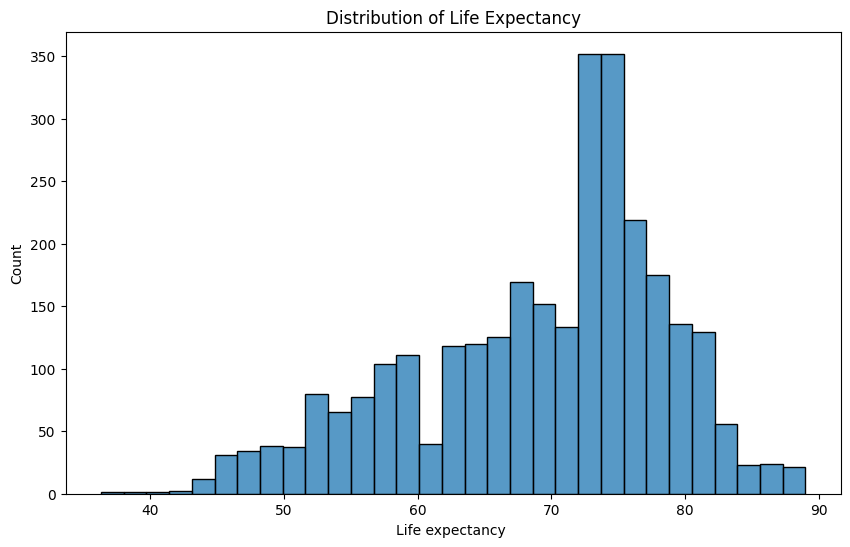

In [ ]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '])
plt.title('Distribution of Life Expectancy')
plt.show()

Now, let's check for outliers in the dataset using boxplots.

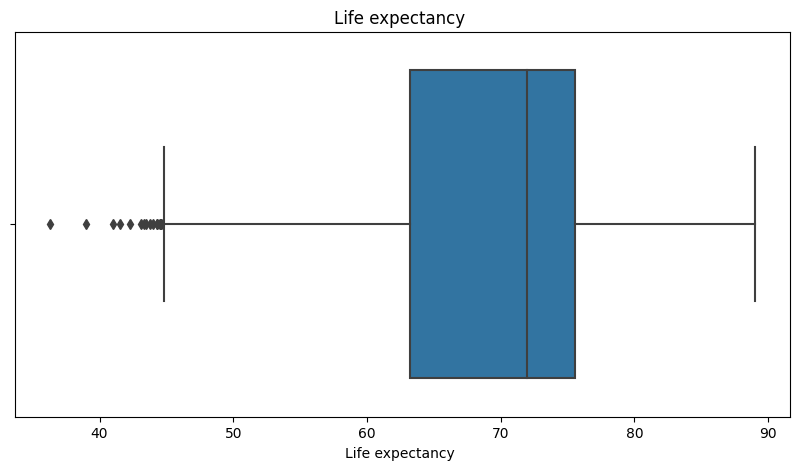

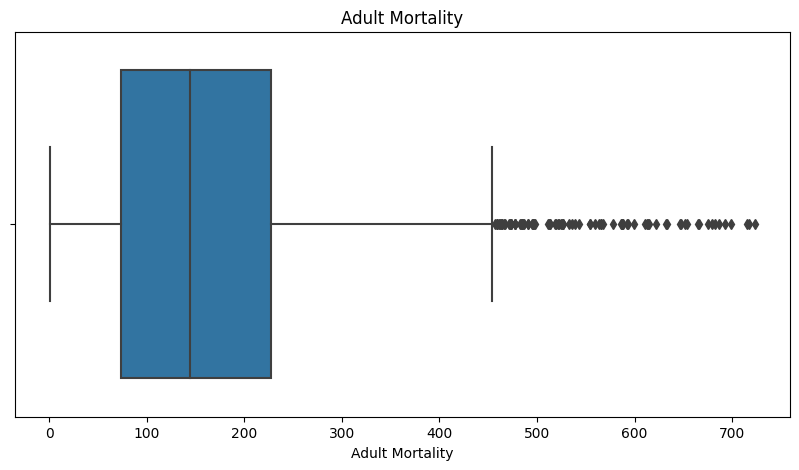

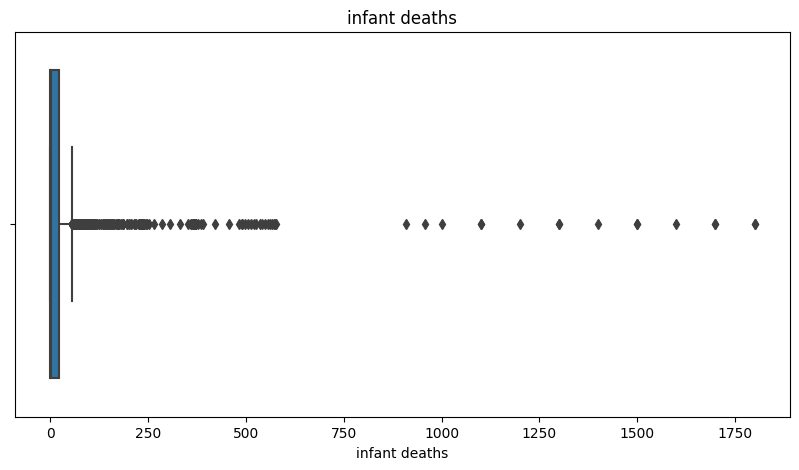

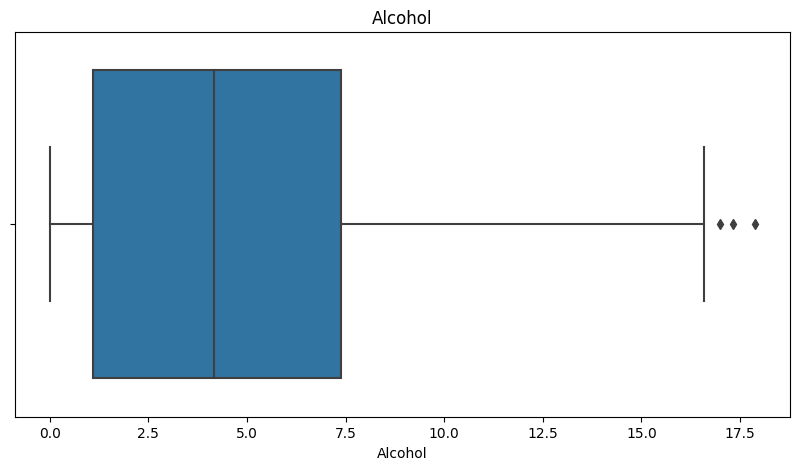

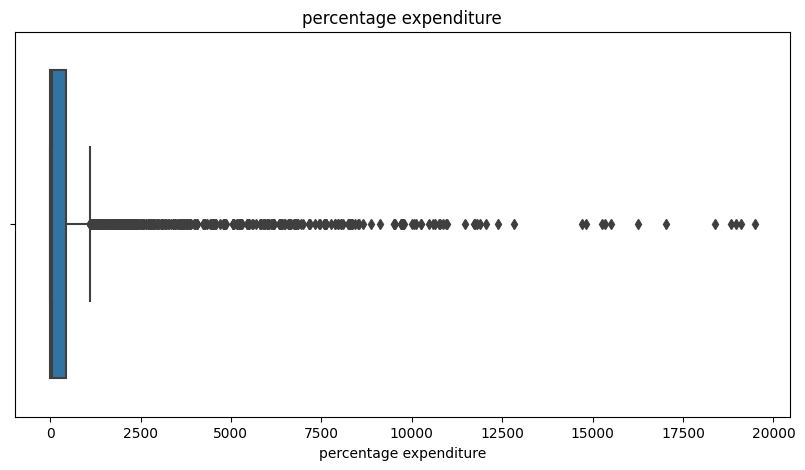

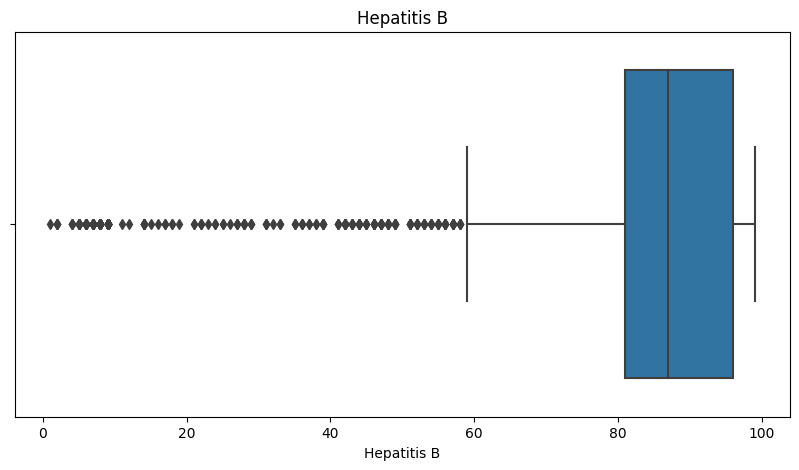

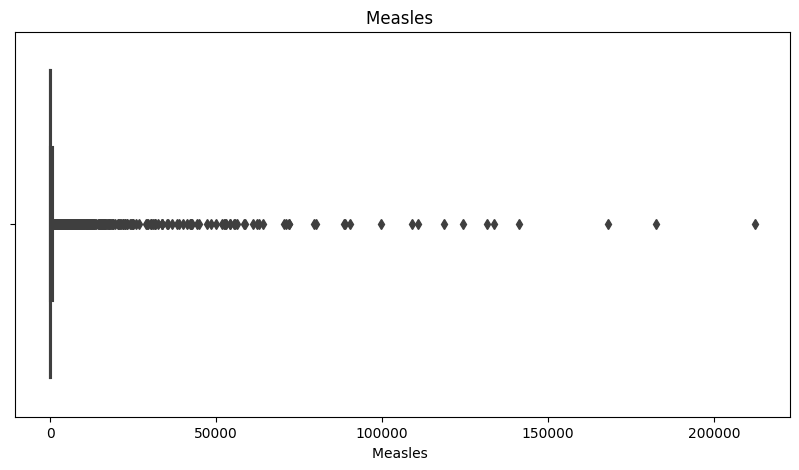

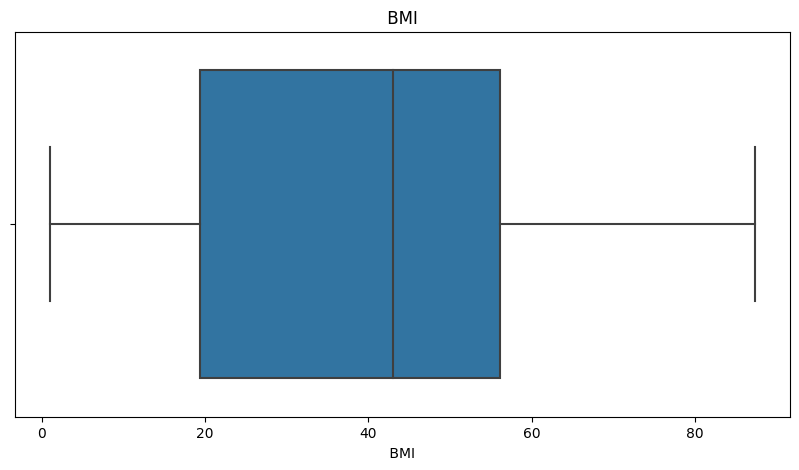

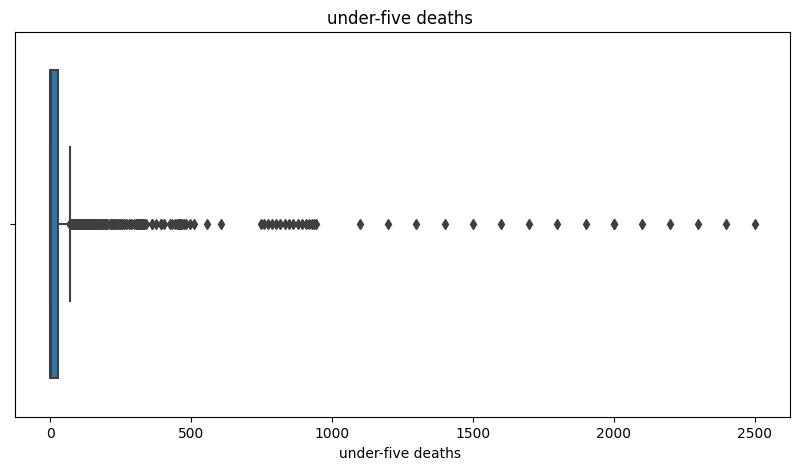

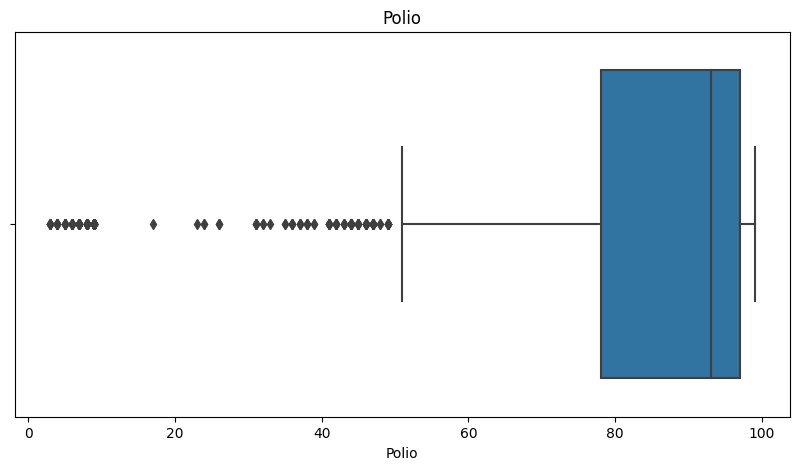

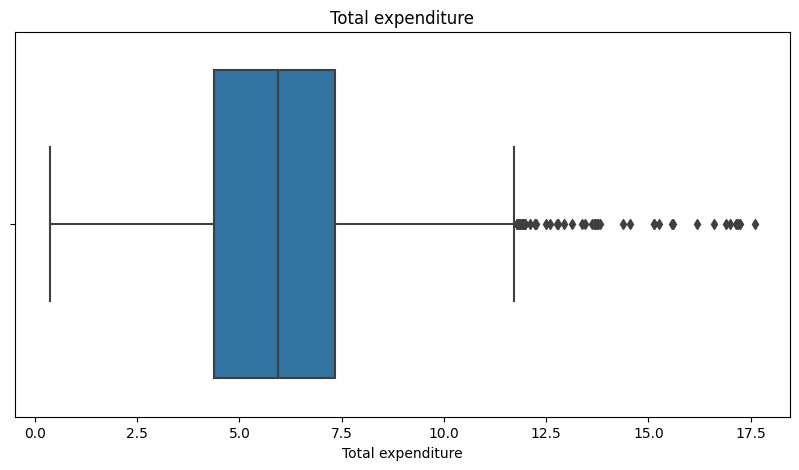

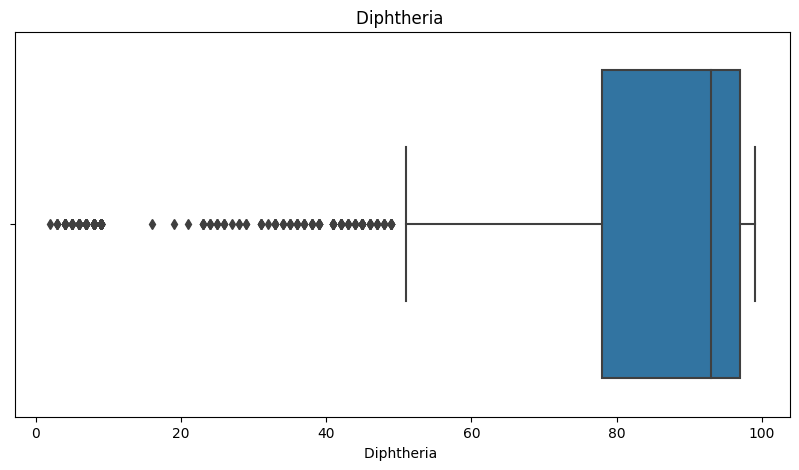

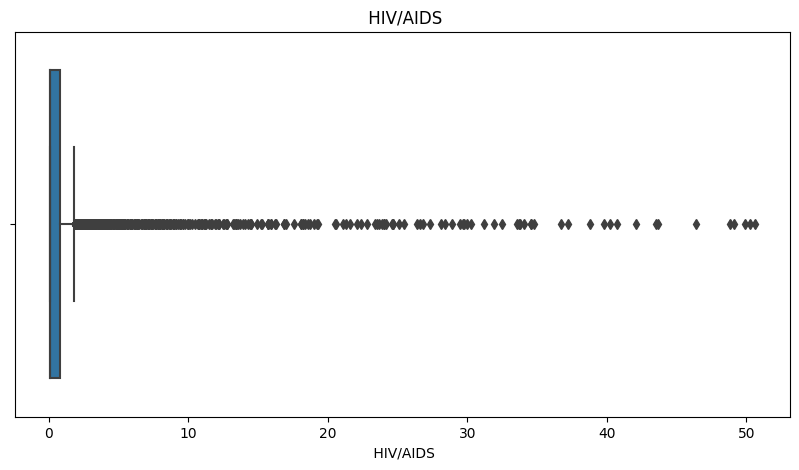

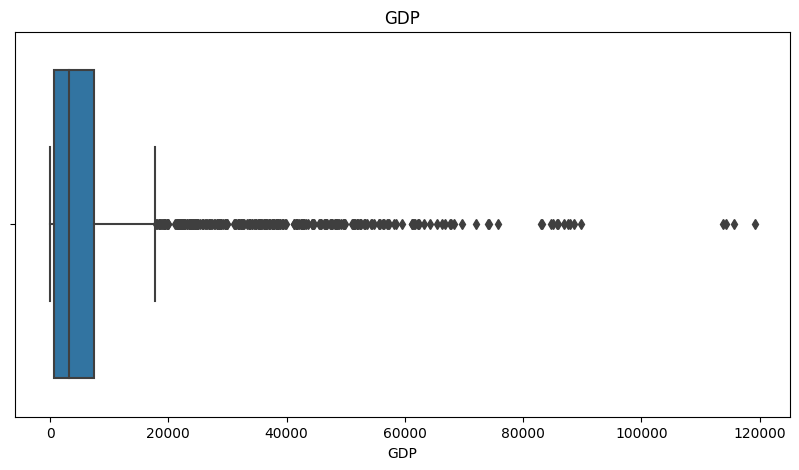

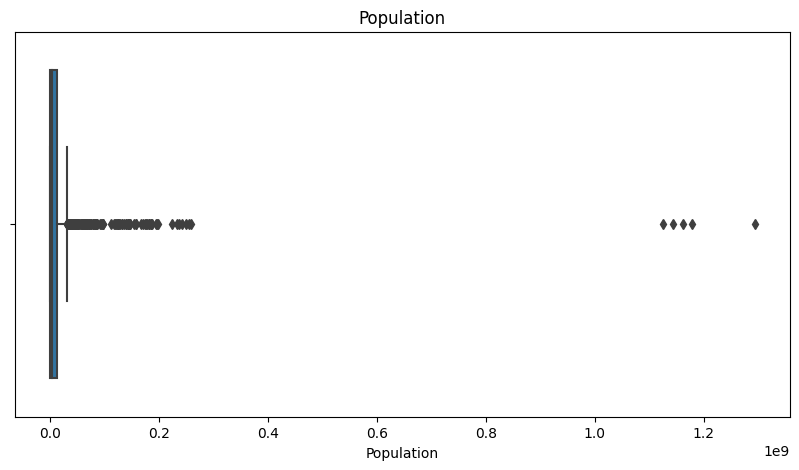

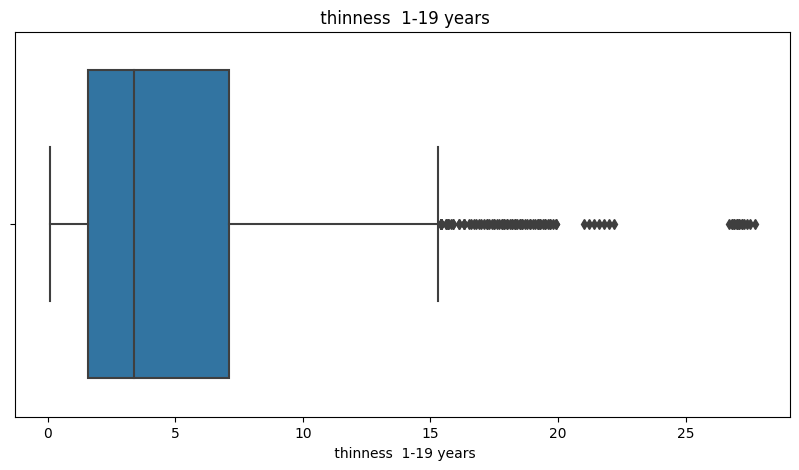

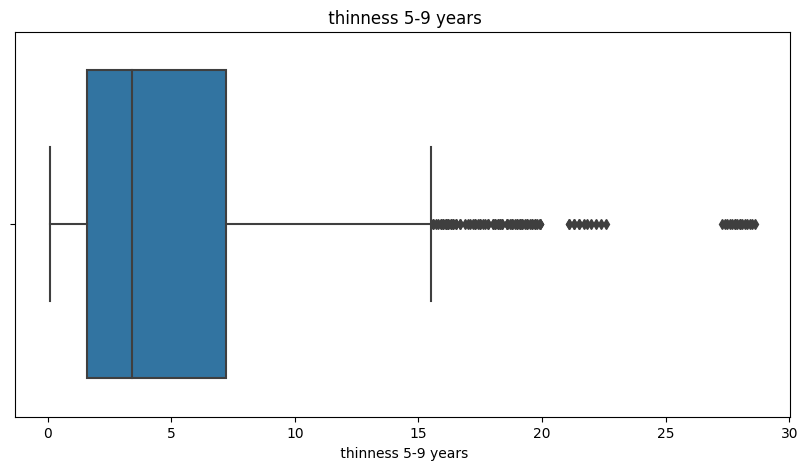

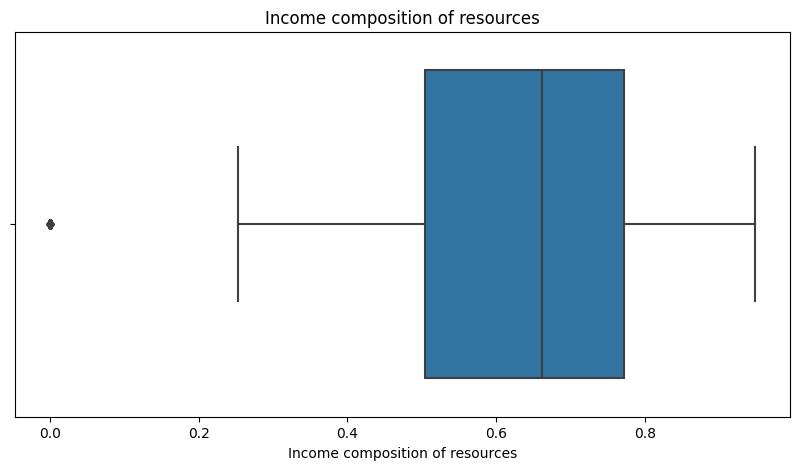

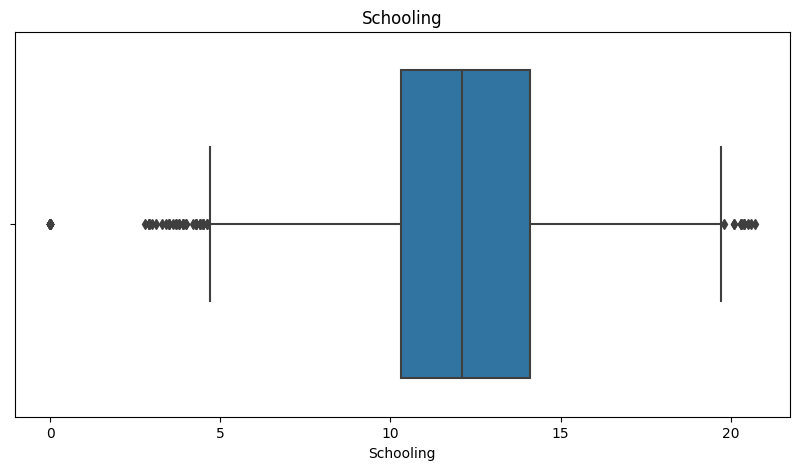

In [ ]:
# Visualizing outliers using boxplots
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [ ]:
# Checking the correlation between the features and the target variable
correlations = df.corr()['Life expectancy '].drop('Life expectancy ')
print(correlations)

Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430493
Population                        -0.019638
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Name: Life expectancy , dtype: float64


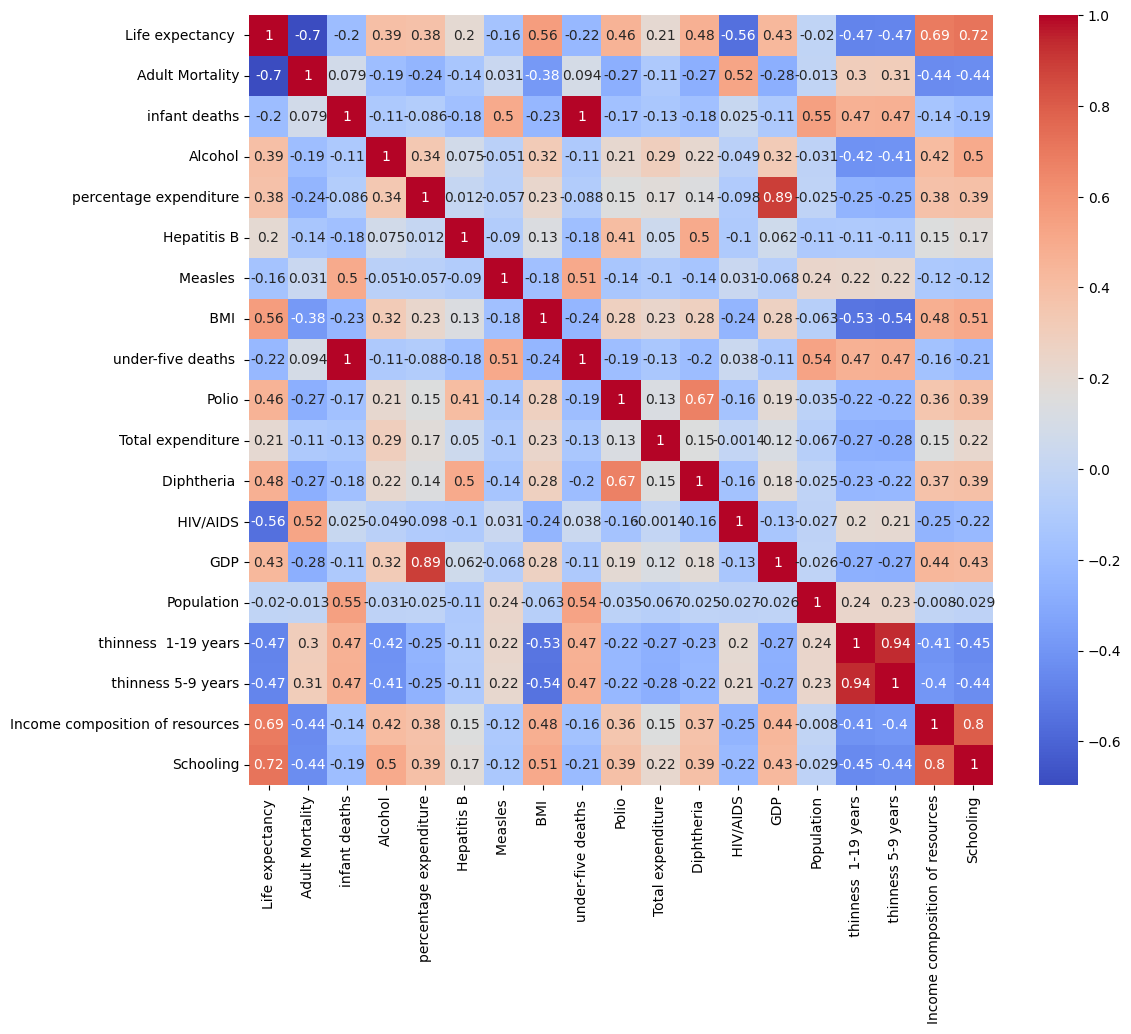

In [ ]:
# Visualizing correlation using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Removing any features that are highly correlated with each other.

In [ ]:
# creating a correlation matrix
corr_matrix = df.corr().abs()

# selecting upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# finding features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# droping the highly correlated features
df = df.drop(to_drop, axis=1)

<ipython-input-58-a11c51c13f5d>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Checking the final shape of the dataset.

In [ ]:
df.shape

(2938, 15)

##Step 2: Feature Engineering, Creating Train, and Test Datasets.

Defining the target variable and the feature variables.

In [ ]:
target = df['Life expectancy ']
features = df.drop('Life expectancy ', axis=1)

Spliting the dataset into training and testing sets, 80/20.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
X_train
#X_test

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources
456,126.0,0,5.28,345.463714,96.000000,0,25.5,98.0,4.30,98.0,0.6,4.864380e+05,8.1,0.602
462,152.0,0,3.81,150.743486,80.940461,0,22.1,91.0,5.19,9.0,0.8,4.437160e+05,9.4,0.562
2172,143.0,0,10.43,0.000000,99.000000,0,44.5,99.0,7.58,99.0,0.1,1.275338e+07,4.3,0.733
2667,13.0,3,1.29,594.645310,98.000000,16,59.3,98.0,7.26,98.0,0.1,1.114558e+06,6.4,0.720
381,95.0,0,0.13,941.703687,99.000000,0,28.0,99.0,3.40,94.0,0.1,1.275338e+07,6.7,0.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,59.0,0,6.91,3601.287457,82.000000,3,68.0,96.0,9.60,96.0,0.1,4.162680e+05,0.8,0.826
1095,287.0,4,3.21,53.307827,83.000000,26,23.1,82.0,6.70,83.0,5.9,1.555880e+05,8.0,0.405
1130,266.0,17,6.08,56.778587,80.940461,0,4.7,62.0,5.56,63.0,2.7,9.556889e+06,4.2,0.458
1294,72.0,2,9.30,3519.258515,95.000000,10982,57.0,97.0,8.17,96.0,0.1,5.731323e+06,0.5,0.841


In [ ]:
y_train
# y_test

456     72.3
462     73.0
2172    74.6
2667    74.9
381     74.8
        ... 
1638    87.0
1095    56.7
1130    61.8
1294    79.9
860     59.4
Name: Life expectancy , Length: 2350, dtype: float64

Scaling the feature variables using StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.31847933, -0.25751384,  0.17610231, ..., -0.24003903,
         0.75374095, -0.14324741],
       [-0.11053505, -0.25751384, -0.20121344, ..., -0.24092167,
         1.0507294 , -0.34160078],
       [-0.18251576, -0.25751384,  1.49799083, ...,  0.01339599,
        -0.11437915,  0.50635989],
       ...,
       [ 0.80122062, -0.1054732 ,  0.38144422, ..., -0.05264344,
        -0.13722441, -0.85731956],
       [-0.75036359, -0.23962671,  1.20794539, ..., -0.13167966,
        -0.98249924,  1.041914  ],
       [-1.05428215, -0.19490887, -0.90450947, ..., -0.24926871,
         1.0507294 , -3.12846569]])

In [ ]:
# Creating polynomial features.

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
X_train_poly

array([[ 1.        , -0.31847933, -0.25751384, ...,  0.56812541,
        -0.10797144,  0.02051982],
       [ 1.        , -0.11053505, -0.25751384, ...,  1.10403227,
        -0.35892998,  0.11669109],
       [ 1.        , -0.18251576, -0.25751384, ...,  0.01308259,
        -0.05791701,  0.25640034],
       ...,
       [ 1.        ,  0.80122062, -0.1054732 , ...,  0.01883054,
         0.11764517,  0.73499682],
       [ 1.        , -0.75036359, -0.23962671, ...,  0.96530476,
        -1.02367972,  1.08558479],
       [ 1.        , -1.05428215, -0.19490887, ...,  1.10403227,
        -3.28717087,  9.78729758]])

Let's select the top 10 features using feature selection.

In [ ]:
# Selecting the top 10 features using feature selection:

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

In [ ]:
# Printing the selected feature names.

selected_features = np.array(poly.get_feature_names_out(features.columns))[selector.get_support()]

print(selected_features)


['Adult Mortality' 'Alcohol' 'percentage expenditure' ' BMI ' 'Polio'
 'Diphtheria ' ' HIV/AIDS' ' thinness  1-19 years'
 'Income composition of resources' 'Adult Mortality^2']


##Step 3: Apply at least 4 algorithms (Training and Testing).
We will start by applying the following algorithms for regression:

1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression
4. XGBoost Regression







###3.1 Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# fit the model on the training data
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

# make predictions on the testing data
y_pred_lr = lr.predict(X_test_selected)


###3.2 Decision Tree Regression:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# fit the model on the training data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_selected, y_train)

# make predictions on the testing data
y_pred_dt = dt.predict(X_test_selected)


###3.3 Random Forest Regression:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# fit the model on the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

# make predictions on the testing data
y_pred_rf = rf.predict(X_test_selected)


###3.4 XGBoost Regression:

In [ ]:
import xgboost as xgb

# convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)

# set the parameters for the XGBoost model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# make predictions on the testing data
y_pred_xgb = xgb_model.predict(dtest)


##Step 4: Generate at least 4 Evaluation Metrics on each algorithm.

We will generate the following evaluation metrics for each algorithm:

1. **Mean Squared Error (MSE):** MSE is the average squared difference between the predicted values and the actual values. It is a measure of how close the predicted values are to the actual values. A lower MSE indicates that the model is more accurate.

2. **Root Mean Squared Error (RMSE):** RMSE is the square root of MSE. It is a measure of the spread of the errors. A lower RMSE indicates that the errors are more tightly clustered around zero.

3. **R-squared (R2):** R-squared is the proportion of the variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates that the model is more able to explain the variance in the dependent variable.

4. **Mean Absolute Error (MAE):** MAE is the average absolute difference between the predicted values and the actual values. It is a measure of the average size of the errors. A lower MAE indicates that the errors are smaller in size.










###4.1 Linear Regression:

In [ ]:
from sklearn.metrics import mean_absolute_error

# evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Results")
print("MSE: {:.2f}".format(mse_lr))
print("RMSE: {:.2f}".format(rmse_lr))
print("R-squared: {:.2f}".format(r2_lr))
print("MAE: {:.2f}".format(mae_lr))

Linear Regression Results
MSE: 18.60
RMSE: 4.31
R-squared: 0.79
MAE: 3.06


###4.2 Decision Tree Regression:

In [ ]:
from sklearn.metrics import mean_absolute_error

# evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Regression Results")
print("MSE: {:.2f}".format(mse_dt))
print("RMSE: {:.2f}".format(rmse_dt))
print("R-squared: {:.2f}".format(r2_dt))
print("MAE: {:.2f}".format(mae_dt))

Decision Tree Regression Results
MSE: 6.30
RMSE: 2.51
R-squared: 0.93
MAE: 1.51


###4.3 Random Forest Regression:

In [ ]:
from sklearn.metrics import mean_absolute_error

# evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Results")
print("MSE: {:.2f}".format(mse_rf))
print("RMSE: {:.2f}".format(rmse_rf))
print("R-squared: {:.2f}".format(r2_rf))
print("MAE: {:.2f}".format(mae_rf))

Random Forest Regression Results
MSE: 3.09
RMSE: 1.76
R-squared: 0.96
MAE: 1.14


###4.4 XGBoost Regression:

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Regression Results")
print("MSE: {:.2f}".format(mse_xgb))
print("RMSE: {:.2f}".format(rmse_xgb))
print("R-squared: {:.2f}".format(r2_xgb))
print("MAE: {:.2f}".format(mae_xgb))

XGBoost Regression Results
MSE: 4.41
RMSE: 2.10
R-squared: 0.95
MAE: 1.56


##Step 5: Comparing the results

Now, we can compare the results of the different algorithms based on the evaluation metrics generated in Step 4.

In [ ]:
from prettytable import PrettyTable

# Creating a new table object
table = PrettyTable()

# Defining the columns
table.field_names = ["Model", "MSE", "RMSE", "R-squared", "MAE"]

# Adding the rows
table.add_row(["Random Forest Regression", "{:.2f}".format(mse_rf), "{:.2f}".format(rmse_rf), "{:.2f}".format(r2_rf), "{:.2f}".format(mae_rf)])
table.add_row(["XGBoost Regression", "{:.2f}".format(mse_xgb), "{:.2f}".format(rmse_xgb), "{:.2f}".format(r2_xgb), "{:.2f}".format(mae_xgb)])
table.add_row(["Decision Tree Regression", "{:.2f}".format(mse_dt), "{:.2f}".format(rmse_dt), "{:.2f}".format(r2_dt), "{:.2f}".format(mae_dt)])
table.add_row(["Linear Regression", "{:.2f}".format(mse_lr), "{:.2f}".format(rmse_lr), "{:.2f}".format(r2_lr), "{:.2f}".format(mae_lr)])

print(table)


+--------------------------+-------+------+-----------+------+
|          Model           |  MSE  | RMSE | R-squared | MAE  |
+--------------------------+-------+------+-----------+------+
| Random Forest Regression |  3.09 | 1.76 |    0.96   | 1.14 |
|    XGBoost Regression    |  4.41 | 2.10 |    0.95   | 1.56 |
| Decision Tree Regression |  6.30 | 2.51 |    0.93   | 1.51 |
|    Linear Regression     | 18.60 | 4.31 |    0.79   | 3.06 |
+--------------------------+-------+------+-----------+------+


##Step 6: Fine Tune the best algorithm.

We can fine-tune the best algorithm, Random Forest Regression, by adjusting its hyperparameters using GridSearchCV.

In [ ]:
# Fine-tuning the Random Forest Regression algorithm
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


We defined a range of values for each hyperparameter, and GridSearchCV trains and tests a model for each possible combination of hyperparameters. We specified 5-fold cross-validation to estimate the model's performance, and n_jobs=-1 to use all available CPU cores. Finally, we printed the best parameters found by the grid search.

After running the code, we can use the best parameters to train a new Random Forest Regression model and evaluate its performance:

In [ ]:
# Training and Testing the fine-tuned Random Forest Regression model
rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_tuned = rf.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)

print("\nRandom Forest Regression (Tuned) Results")
print("MSE: {:.2f}".format(mse_rf_tuned))
print("RMSE: {:.2f}".format(rmse_rf_tuned))
print("R-squared: {:.2f}".format(r2_rf_tuned))
print("MAE: {:.2f}".format(mae_rf_tuned))


Random Forest Regression (Tuned) Results
MSE: 2.78
RMSE: 1.67
R-squared: 0.97
MAE: 1.09


In [ ]:
# Compairing results

from prettytable import PrettyTable

# Creating a new table object
table = PrettyTable()

# Defining the columns
table.field_names = ["Model", "MSE", "RMSE", "R-squared", "MAE"]

# Adding the rows
table.add_row(["Random Forest Regression", "{:.2f}".format(mse_rf), "{:.2f}".format(rmse_rf), "{:.2f}".format(r2_rf), "{:.2f}".format(mae_rf)])
table.add_row(["Random Forest Regression (Tuned)", "{:.2f}".format(mse_rf_tuned), "{:.2f}".format(rmse_rf_tuned), "{:.2f}".format(r2_rf_tuned), "{:.2f}".format(mae_rf_tuned)])

print(table)

+----------------------------------+------+------+-----------+------+
|              Model               | MSE  | RMSE | R-squared | MAE  |
+----------------------------------+------+------+-----------+------+
|     Random Forest Regression     | 3.09 | 1.76 |    0.96   | 1.14 |
| Random Forest Regression (Tuned) | 2.78 | 1.67 |    0.97   | 1.09 |
+----------------------------------+------+------+-----------+------+


We can see that the fine-tuned Random Forest Regression model has improved slightly compared to the original model, with lower MSE, RMSE, and MAE, and a slightly higher R-squared value.